In [1]:
!pip install tensorflow

In [2]:
!pip install numpy==1.26.1

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import MinMaxNorm
from keras.layers import Dense
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D,Lambda,Conv2D,MaxPooling2D,Dropout,Dense,Flatten,Activation
from keras.preprocessing.image import ImageDataGenerator

C:\Users\SOT-29\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
classes = ["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [6]:
num_classes = len(classes)
num_classes

10

In [7]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [8]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
IMAGE_SIZE = 32
CHANNELS = 3
NUM_EPOCH = 350
LEARN_RATE = 1.0e-4

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
def pure_cnn_model():

  model = Sequential()

  model.add(Conv2D(96,(3,3),activation='relu',padding = 'same',input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))
  model.add(Dropout(0.2))

  model.add(Conv2D(96,(3,3),activation='relu',padding = 'same'))
  model.add(Conv2D(96,(3,3),activation='relu',padding = 'same',strides = 2))
  model.add(Dropout(0.5))

  model.add(Conv2D(192,(3,3),activation='relu',padding = 'same'))
  model.add(Conv2D(192,(3,3),activation='relu',padding = 'same'))
  model.add(Conv2D(192,(3,3),activation='relu',padding = 'same',strides = 2))
  model.add(Dropout(0.5))

  model.add(Conv2D(192,(3,3),padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192,(1,1),padding = 'valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(10,(1,1),padding = 'valid'))

  model.add(GlobalAveragePooling2D())

  model.add(Activation('softmax'))
  model.summary()

  return model


In [14]:
model = pure_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 dropout (Dropout)           (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       166080    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 192)       3

In [15]:
checkpoint = ModelCheckpoint('best_model_simple.h5',
monitor = 'val_loss',
  verbose = 0,
                   save_best_only = True,
                   mode = 'auto')

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=LEARN_RATE),
              metrics = ['accuracy'])

In [17]:
model_details = model.fit(X_train,y_train_one_hot,batch_size = 128,epochs=NUM_EPOCH,validation_data = (X_test,y_test_one_hot),callbacks = [checkpoint],verbose = 1)

Epoch 1/350
391/391 [==============================] - 200s 509ms/step - loss: 1.9972 - accuracy: 0.2397 - val_loss: 1.8330 - val_accuracy: 0.3176
Epoch 2/350


C:\Users\SOT-29\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 207s 530ms/step - loss: 1.6851 - accuracy: 0.3718 - val_loss: 1.6385 - val_accuracy: 0.4003
Epoch 3/350
391/391 [==============================] - 207s 528ms/step - loss: 1.5673 - accuracy: 0.4232 - val_loss: 1.5526 - val_accuracy: 0.4283
Epoch 4/350
391/391 [==============================] - 207s 529ms/step - loss: 1.5075 - accuracy: 0.4466 - val_loss: 1.4516 - val_accuracy: 0.4702
Epoch 5/350
391/391 [==============================] - 206s 528ms/step - loss: 1.4535 - accuracy: 0.4704 - val_loss: 1.4037 - val_accuracy: 0.4905
Epoch 6/350
391/391 [==============================] - 207s 529ms/step - loss: 1.4105 - accuracy: 0.4831 - val_loss: 1.3449 - val_accuracy: 0.5121
Epoch 7/350
391/391 [==============================] - 207s 528ms/step - loss: 1.3643 - accuracy: 0.5040 - val_loss: 1.3179 - val_accuracy: 0.5255
Epoch 8/350
391/391 [==============================] - 206s 528ms/step - loss: 1.3192 - accuracy: 0.5240 - val_loss: 1.2539 - val_

In [18]:
scores = model.evaluate(X_test,y_test_one_hot,verbose = 0)
print("Accuracy : %.2f%%" % (scores[1]*100))

Accuracy : 84.47%


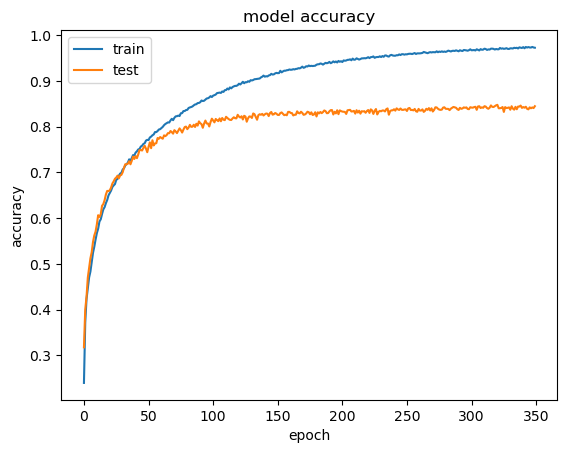

In [30]:
plt.plot(model_details.history['accuracy'])
plt.plot(model_details.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

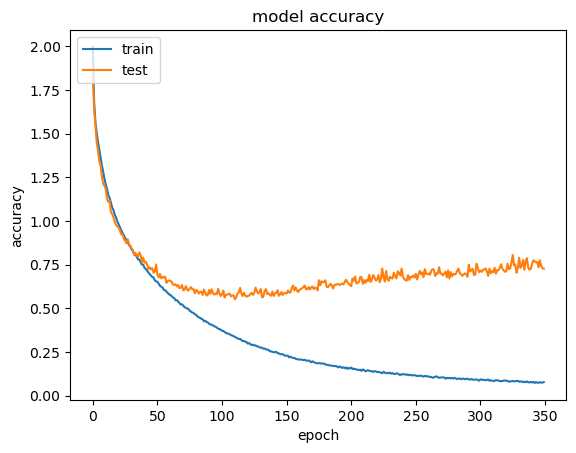

In [29]:
plt.plot(model_details.history['loss'])
plt.plot(model_details.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()